In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from helpers import *
import matplotlib.pyplot as plt
import numpy as np

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
truth_seeker = pd.read_csv("TruthSeeker2023/Features_For_Traditional_ML_Techniques.csv")
truth_seeker = truth_seeker.drop(columns=["Unnamed: 0"])

In [3]:
truth_seeker_features = truth_seeker.drop(columns=["majority_target", "statement", "BinaryNumTarget", "tweet", "embeddings"])
truth_seeker_output = truth_seeker["BinaryNumTarget"]
truth_seeker_test = truth_seeker[['favourites_count', 'statuses_count', 'Average word length', 'cred']]

# Split the data into training and testing sets (e.g., 75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(
    truth_seeker_features,
    truth_seeker_output,
    test_size=0.25,  # Adjust the test_size as needed
    random_state=100  # You can set a random seed for reproducibility
)

In [4]:
# Create a RandomForestClassifier instance
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = rf_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = list(X_train.columns)  # Replace with your actual feature names or column names

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]



Test Accuracy: 0.6899


In [11]:
feature_names

['followers_count',
 'friends_count',
 'favourites_count',
 'statuses_count',
 'listed_count',
 'following',
 'BotScore',
 'BotScoreBinary',
 'cred',
 'normalize_influence',
 'mentions',
 'quotes',
 'replies',
 'retweets',
 'favourites',
 'hashtags',
 'URLs',
 'unique_count',
 'total_count',
 'ORG_percentage',
 'NORP_percentage',
 'GPE_percentage',
 'PERSON_percentage',
 'MONEY_percentage',
 'DATE_percentage',
 'CARDINAL_percentage',
 'PERCENT_percentage',
 'ORDINAL_percentage',
 'FAC_percentage',
 'LAW_percentage',
 'PRODUCT_percentage',
 'EVENT_percentage',
 'TIME_percentage',
 'LOC_percentage',
 'WORK_OF_ART_percentage',
 'QUANTITY_percentage',
 'LANGUAGE_percentage',
 'Word count',
 'Max word length',
 'Min word length',
 'Average word length',
 'present_verbs',
 'past_verbs',
 'adjectives',
 'adverbs',
 'adpositions',
 'pronouns',
 'TOs',
 'determiners',
 'conjunctions',
 'dots',
 'exclamation',
 'questions',
 'ampersand',
 'capitals',
 'digits',
 'long_word_freq',
 'short_word_fr

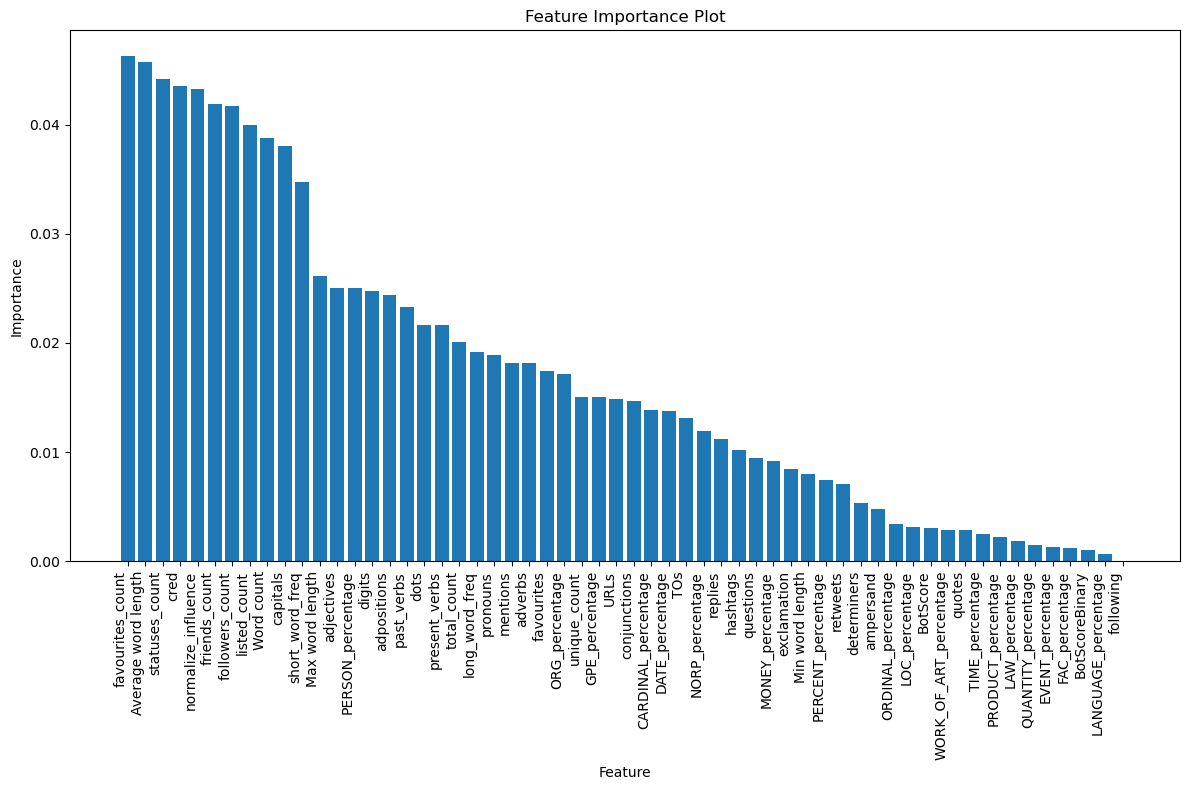

In [5]:
# Plotting
plt.figure(figsize=(12, 8))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90, ha='right')  # Adjust rotation and horizontal alignment
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance Plot")
plt.tight_layout()  # Adjust layout for better spacing
plt.show()